<a href="https://colab.research.google.com/github/Ciambelle-Ciociare/ADM_Homework3/blob/main/DMT2023_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# DMT 2023 - Homework 3

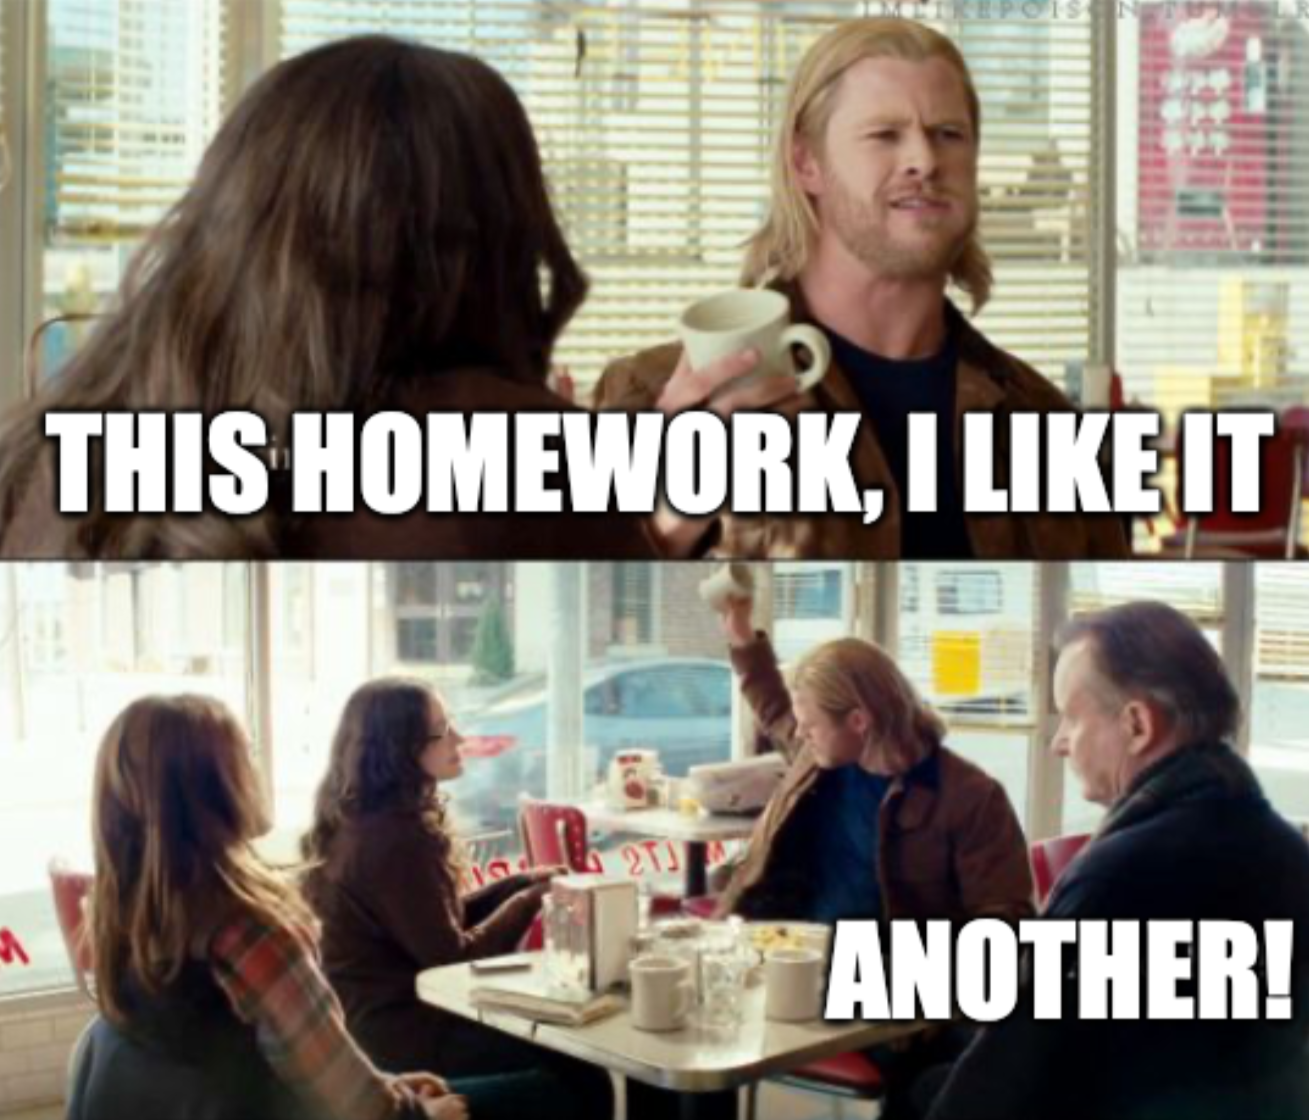


# Instructions for the homework
  > Follow the instructions in the notebook carefully or not!!!
  


## General instructions
  * Do NOT remove ANYTHING that is already in the notebook.
  * Before you start, show the line number for the code cells:
    * Go to Tools -> Settings -> Editor -> show line numbers
  * Having **EXACTLY TWO** students per group is **MANDATORY**
  * The software must be commented.
  * The notebook will be converted to a PDF, so you must use prints and plots that are displayed in the derived PDF.
  * About this notebook:
    * Create a personal copy to be able to modify it: File > Save a copy in Drive
    * Rename the copied notebook `DMT2023-HW3.ipynb`


## Instructions for **code**:
  * DO NOT add code cells
  * DO NOT remove any code cells
  * Only edit the code cells containing the comment `#YOUR CODE STARTS HERE#`. Within those cells:
    * DO NOT remove ANYTHING that we have written (otherwise specified). In particular, the line `#REMOVE_OUTPUT#` is used in some cells to remove the output of those cells when the notebook is converted to PDF.
    * Add your code between line `#YOUR CODE STARTS HERE#` and line `#YOUR CODE ENDS HERE#`; **DO NOT REMOVE THESE COMMENTS**
    * The last line in each code cell is #THIS IS LINE \<TOT>#, where \<TOT> is a line number. The notebook is constructed so that \<TOT> matches with the line number in which it is written, but it may of course move as you add your code. **Make sure that, when you deliver it, that comment returns to line \<TOT>.** DO NOT CHANGE THE \<TOT> VALUE. Of course, this means that you have a limited number of lines of code that you may NOT exceed under any circumstances. On the other hand, if your code is shorter than that, you have to reach that line number with empty lines.

[comment]: <> (#REMOVE_CELL#)


## Instructions for **text**:
* DO NOT add text cells
* DO NOT remove text cells
* DO NOT modify the text cells we have created.
* Only edit text cells starting with the comment ------------YOUR TEXT STARTS HERE------------. Within those cells:
  * Do NOT remove anything we have entered.
  * **Add your own text after the line ------------YOUR TEXT STARTS HERE------------; DO NOT REMOVE THIS TEXT**
  * For each cell, a specific delivery will be given. If you are given a maximum number of sentences to write, both the dot "." and the semicolon ";" will be considered sentence dividers.

[comment]: <> (#REMOVE_CELL#)

## Group composition:

Write down the list of group members. The format should be Last Name, First Name, Student ID. Group members should be sorted alphabetically by surname and placed on different lines.
Example:

Becchetti, Luca, 123456

Siciliano, Federico, 987654

------------YOUR TEXT STARTS HERE------------

Barba, Paolo 1885324 \
Aurora, Bassani 1852791


<div style="page-break-after: always; visibility: hidden">
\pagebreak
</div>

## Homework 3
The homework consists of two parts:

  1. Dimensionality Reduction

  and

  2. Supervised Learning

> Ensure that the notebook can be faithfully reproduced by anyone (hint: pseudo random number generation).

> If you need to set a random seed, set it to `160`.

# Part 1
In this part of the homework, you have to deal with Dimensionality Reduction.

Import **ALL** the Python packages that you need for Part 1.

In [ ]:
#REMOVE_OUTPUT#
!pip install --upgrade --no-cache-dir gdown
from bs4 import BeautifulSoup
#YOUR CODE STARTS HERE#
import pandas as pd
import numpy as np
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models import LsiModel
from gensim import corpora
from gensim import matutils
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt
from collections import Counter
import re

#YOUR CODE ENDS HERE#
#THIS IS LINE 20#

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Part 1.1
The data you need to process comes from the book *Le Morte D'Arthur* by Thomas Malory.

You have to carry out Topic Modeling on book chapters.

The goal is to achieve a topic division within the following limits:

- The total computation may not exceed 10 minutes (starting from Part 1.1.5; Parts 1.1.1 to 1.1.4 are not considered for time calculation)
- The division into topics must be the "best one"

### 1.1.1
Download the data from the Drive link (code already provided).

In [ ]:
#REMOVE_OUTPUT#
!gdown 1zHgvidy9FvhZvE68S0mXWkoF-hHMpiUL
!gdown 1VjpTkFcbfaLIi4TXVafokW9e_bvGnfut

Downloading...
From: https://drive.google.com/uc?id=1zHgvidy9FvhZvE68S0mXWkoF-hHMpiUL
To: /content/The Project Gutenberg eBook of Le Morte D’Arthur, Volume I (of II), by Thomas Malory.html
100% 964k/964k [00:00<00:00, 540MB/s]
Downloading...
From: https://drive.google.com/uc?id=1VjpTkFcbfaLIi4TXVafokW9e_bvGnfut
To: /content/The Project Gutenberg eBook of Le Morte D’Arthur, Volume II (of II), by Thomas Malory.html
100% 1.10M/1.10M [00:00<00:00, 515MB/s]


### 1.1.2
Parse the HTML. **Part** of code already provided: follow the comments to complete the code.


In [ ]:
with open('The Project Gutenberg eBook of Le Morte D’Arthur, Volume I (of II), by Thomas Malory.html') as fp:
    vol1 = BeautifulSoup(fp, 'html.parser')
with open('The Project Gutenberg eBook of Le Morte D’Arthur, Volume II (of II), by Thomas Malory.html') as fp:
    vol2 = BeautifulSoup(fp, 'html.parser')

def clean_text(txt):
    words_to_put_space_before = [".",",",";",":","’","'"]
    words_to_lowercase = ["First","How","Some","Yet","Of","A","The","What","Fifth"]

    app = txt.replace("\n"," ")
    for word in words_to_put_space_before:
        app = app.replace(word," "+word)
    for word in words_to_lowercase:
        app = app.replace(word+" ",word.lower()+" ")
    return app.strip()

def parse_html(soup):
    titles = []
    texts = []
    for chapter in soup.find_all("h3"):
        chapter_title = chapter.text
        if "CHAPTER" in chapter_title:
            chapter_title = clean_text("".join(chapter_title.split(".")[1:]))
            titles.append(chapter_title)

            chapter_text = [p.text for p in chapter.findNextSiblings("p")]
            chapter_text = clean_text(" ".join(chapter_text))
            texts.append(chapter_text)
    return titles, texts

In [ ]:
#YOUR CODE STARTS HERE#
#Extract all the chapters' titles and texts from the two volumes
titles_1, texts_1 = parse_html(vol1) # Parse the html file of the first book
titles_2, texts_2 = parse_html(vol2) # Parse the html file of the second book

titles = titles_1 + titles_2         # Concatenate the titles lists
texts = texts_1 + texts_2            # Concatenate the texts lists




#Transform the list into a pandas DataFrame.
book = pd.DataFrame({'titles': titles , 'texts': texts })   # Creating a DataFrame with titles and texts of all the chapters
book.insert(0, "docno", range(1, book.shape[0] + 1))        # Adding a column refering the documents' number
book['docno'] = book['docno'].apply(lambda x : str(x))      # Converting the type of the "docno" column into string



#YOUR CODE ENDS HERE#
#THIS IS LINE 20#

Print the last 8 rows of the DataFrame.

[comment]: <> (#SHOW_CELL#)

In [ ]:
#YOUR CODE STARTS HERE#


print('The last 8 rows of the books DataFrame are: \n')
book.tail(8) # Show the last 8 rows of the book DataFrame



#YOUR CODE ENDS HERE#
#THIS IS LINE 10#

The last 8 rows of the books DataFrame are: 



,docno,titles,texts
495,496,how Sir Bedivere found him on the morrow dead ...,"Then was Sir Bedivere glad , and thither he we..."
496,497,of the opinion of some men of the death of Kin...,yet some men say in many parts of England that...
497,498,how when Sir Lancelot heard of the death of Ki...,And when he heard in his country that Sir Mord...
498,499,how Sir Launcelot departed to seek the Queen G...,"Then came Sir Bors de Ganis , and said : My lo..."
499,500,how Sir Launcelot came to the hermitage where ...,"But sithen I find you thus disposed , I ensure..."
500,501,how Sir Launcelot went with his seven fellows ...,"Then Sir Launcelot rose up or day , and told t..."
501,502,"how Sir Launcelot began to sicken , and after ...",Then Sir Launcelot never after ate but little ...
502,503,how Sir Ector found Sir Launcelot his brother ...,And when Sir Ector heard such noise and light ...


<div style="page-break-after: always; visibility: hidden">
\pagebreak
</div>

### 1.1.3
Extract character's names from the **titles** only. **Part** of code already provided: follow the comments to complete the code.

In [ ]:
all_characters = set()
def extract_character_names_from_string(string_to_parse):
    special_tokens = ["of","the","le","a","de"]

    remember = ""
    last_is_special_token = False

    tokens = string_to_parse.split(" ")
    characters_found = set()
    for i,word in enumerate(tokens):
        if word[0].isupper() or (remember!="" and word in special_tokens):
            #word = word.replace("'s","").replace("’s","")
            last_is_special_token = False
            if remember!="":
                if word in special_tokens:
                    last_is_special_token = True
                remember = remember+" "+word
            else: remember = word
        else:
            if remember!="":
                if last_is_special_token:
                    for tok in special_tokens:
                        remember = remember.replace(" "+tok,"")
                characters_found.add(remember)
            remember = ""
            last_is_special_token = False
    return characters_found

#all_characters = set([x for x in all_characters if x[-2:]!="'s"])

In [ ]:
#YOUR CODE STARTS HERE#
#Extract all characters' names



names_list = book.titles.apply(extract_character_names_from_string)   # Selecting for each titles the characters' name present in it
characters = set().union(*names_list)                                 # Taking the union of the distinct characters in the previous list






#YOUR CODE ENDS HERE#
#THIS IS LINE 15#

Print the names of all the knights (i.e. characters with `Sir` in their name).

[comment]: <> (#SHOW_CELL#)

In [ ]:
#YOUR CODE STARTS HERE#


knights = [x for x in characters if 'Sir' in x] # Selecting all the the characters that cointain 'Sir' in their name

print('The names of all the knights are:\n') # Print them
print(knights)

#YOUR CODE ENDS HERE#
#THIS IS LINE 10#

The names of all the knights are:

['Sir Berluse', 'Sir Tristram', 'Sir Alisander', 'Sir Belliance', 'Sir Mordred', 'Sir Accolon of Gaul', 'Sir Gaheris', 'Sir Pedivere', 'Sir Pelleas', 'Sir Lancelot', 'Sir Lionel', 'Sir Breuse Saunce Pité', 'Sir Beaumains', 'Sir Carados', 'Sir Epinogris', 'Sir Lamorak de Galis', 'Sir Elias', 'Sir Palomides', 'Sir Colgrevance', 'Sir Bleoberis', 'Sir Mador', 'Sir Meliagrance', 'Sir Frol', 'Sir Amant', 'Sir Bliant', 'Sir Persant of Inde', 'Sir Accolon', 'Sir Tor', 'Sir Blamore', 'Sir Uriens', 'Sir Uwaine', 'Sir Percivale', 'Sir Safere', 'Sir Turquine', 'Sir Nabon', 'Sir Launcelot', 'Sir Lanceor', 'Sir Pervivale', 'Sir Brian', 'Sir Agravaine', 'Sir Malgrin', 'Sir Galahalt', 'Sir Tristram de Liones', 'Sir Marhaus', 'Sir Suppinabiles', 'Sir Bedivere', 'Sir Segwarides', 'Sir Dinadan', 'Sir Lavaine', 'Sir Sagramore le Desirous', 'Sir Lamorak', 'Sir Dagonet', 'Sir Sadok', 'Sir Breunor', 'Sir Meliagaunce', 'Sir Gareth', 'Sir Galihodin', 'Sir Aglovale', 'Sir Gala

<div style="page-break-after: always; visibility: hidden">
\pagebreak
</div>

### 1.1.4
Preprocess the data

> Consider only the titles

> Each document must be a list of terms

> Discard documents that have less than 10 (non-unique) terms before the preprocessing

> After preprocessing, each document must be represented by at least 5 tokens

- Several preprocessing options are possible



In [ ]:
#YOUR CODE STARTS HERE#

# Selecting documents with at least 10 terms
greater_than_10= book.titles.apply(lambda x: len(set(x.split(' '))))>=10
documents = book[greater_than_10]

# Defining a function for preprocessing the titles
def preprocess_data(doc_text):
    en_stop = set(stopwords.words('english')) # create English stop words list
    en_stop.difference_update(['the', 'and']) # removing 'the' and 'and' from the stopwords
    min_length = 3                            # defining the minimum length of each word
    processed_tokenized_texts = []
    tokenized_text = doc_text.split(" ")
    stopped_tokens = [token for token in tokenized_text if not token in en_stop]         # remove stop words from tokens
    meaningful_tokens = [token for token in stopped_tokens if len(token) >= min_length]  # remove very small words, length < 3
    return meaningful_tokens


# Adding to documents a column with a list of preprocessed document terms
documents.insert(3 , "tokens" , documents["titles"].apply(lambda x: preprocess_data(x)))

# Showing the result
print(f"After preprocessing, the minimun number of tokens is: {min(map(len,documents.tokens))}")















#YOUR CODE ENDS HERE#
#THIS IS LINE 40#

After preprocessing, the minimun number of tokens is: 5


Print the documents where the (preprocessed) term `Bedivere` appears.

[comment]: <> (#SHOW_CELL#)

In [ ]:
#YOUR CODE STARTS HERE#

# Selecting documnets where 'Bedivere' appears
bedivere = documents[['Bedivere' in x for x in  documents.tokens]]

# Showing the results
print('The documents where Bedivere appears are: \n')
bedivere
#YOUR CODE ENDS HERE#
#THIS IS LINE 10#

The documents where Bedivere appears are: 



,docno,titles,texts,tokens
495,496,how Sir Bedivere found him on the morrow dead ...,"Then was Sir Bedivere glad , and thither he we...","[Sir, Bedivere, found, the, morrow, dead, herm..."


<div style="page-break-after: always; visibility: hidden">
\pagebreak
</div>

### 1.1.5
Build a dictionary of the terms in the documents.

In [ ]:
#YOUR CODE STARTS HERE#






# Building a dictionary of the terms in the documents
dictionary = corpora.Dictionary(documents.tokens)









#YOUR CODE ENDS HERE#
#THIS IS LINE 20#

Print out the 5 most common terms

[comment]: <> (#SHOW_CELL#)

In [ ]:
#YOUR CODE STARTS HERE#
words = []
for word in documents.tokens:               # Looping over each term
  words += word                             # Concatenating all the terms
frequencies = Counter(words)                # Counting the frequencies of each term
best_5 = sorted(frequencies.items(), key=lambda x:x[1], reverse = True)[:5]     # Sorting the terms by their frequencies
print('The 5 most common terms are: \n')    # Showing the results
print(best_5)
#YOUR CODE ENDS HERE#
#THIS IS LINE 10#

The 5 most common terms are: 

[('and', 721), ('Sir', 589), ('the', 476), ('King', 153), ('Launcelot', 148)]


<div style="page-break-after: always; visibility: hidden">
\pagebreak
</div>

### 1.1.6
Perform a document-term encoding of the dataset.

- Several encodings are possible

In [ ]:
#YOUR CODE STARTS HERE#


# performin document-term encoding
doc_term_matrix = [dictionary.doc2bow(doc) for doc in documents.tokens]

# trasforming it into a matrix
matrix = matutils.corpus2dense(doc_term_matrix, num_terms=len(dictionary)).T










#YOUR CODE ENDS HERE#
#THIS IS LINE 20#

Print out the sparsity of the matrix

[comment]: <> (#SHOW_CELL#)

In [ ]:
#YOUR CODE STARTS HERE#
# Counting the number of zero in the matrix
num_zero = np.sum(matrix==0)
# Taking the number of entries of the matrix
num_entries = matrix.size
# Computing the sparsity of the matrix as num_zero/num_entries
sparsity = num_zero/num_entries
print('The sparsity of the matrix is:', round(sparsity*100,2), '%')
#YOUR CODE ENDS HERE#
#THIS IS LINE 10#

The sparsity of the matrix is: 98.94 %


<div style="page-break-after: always; visibility: hidden">
\pagebreak
</div>

### 1.1.7
Perform Latent Semantic Analysis for at least 5 different numbers of topics.

In [ ]:
#YOUR CODE STARTS HERE#


# Initializing a vector with the number of topics we'll try
number_of_topics = list(range(2,50,1))

# initializing a dictionary in which we'll store the model associated to each number of topic
models = {}


for ind , n in enumerate(number_of_topics):
  # Performing Latent Semantic Analysis for each n
  models[ind] = LsiModel(doc_term_matrix, num_topics= n, id2word = dictionary, random_seed = 160)





#YOUR CODE ENDS HERE#
#THIS IS LINE 20#

### 1.1.8
For each of the calculations above, calculate a measure of the "goodness" of the division into topics.

In [ ]:
#YOUR CODE STARTS HERE#

# Initializing an empty list in which we'll store the coherence values of each LSA
coherence_values = []

for i, n in enumerate(number_of_topics):

  # Computing the coherence value
  coherence_model = CoherenceModel(model=models[i], texts=documents.tokens, dictionary=dictionary, coherence='u_mass')

  # Storing the result
  coherence_values.append(coherence_model.get_coherence())






#YOUR CODE ENDS HERE#
#THIS IS LINE 20#

Plot the measure as the number of topics varies.

[comment]: <> (#SHOW_CELL#)

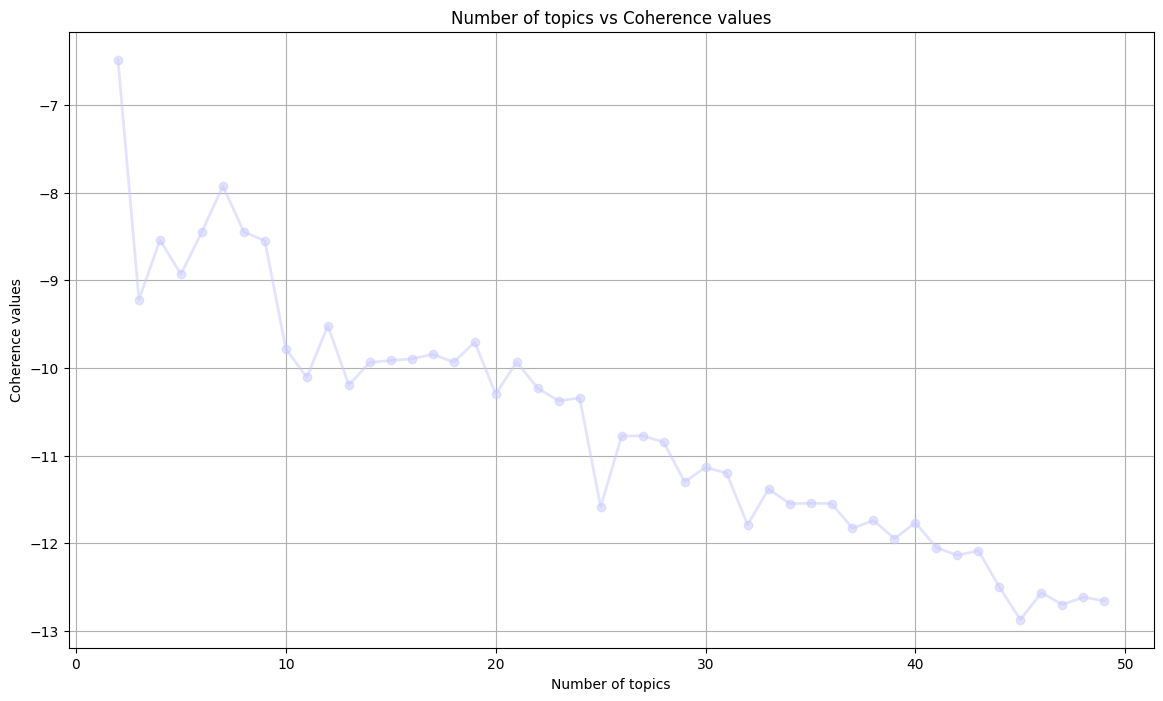

In [ ]:
#YOUR CODE STARTS HERE#


fig, ax = plt.subplots(figsize=(14, 8))
# Create a scatter plot
scatter = ax.plot(number_of_topics, coherence_values,
                     marker = 'o' ,
                     alpha=0.5,
                     color = "#c9c9ff",
                     linewidth = 2 )
ax.grid()
# Customize the plot
ax.set_xlabel('Number of topics')
ax.set_ylabel('Coherence values')
ax.set_title('Number of topics vs Coherence values')
# Show the plot
plt.show()

#YOUR CODE ENDS HERE#
#THIS IS LINE 20#

Which number of topics is the "best" to model this dataset?

**Use at most 2 sentences.**

[comment]: <> (#SHOW_CELL#)

----------YOUR TEXT STARTS HERE----------

The coherence value measures the degree of semantic similarity between words within each topic generated by the model by assessing how much the words within a topic form meaningful relationships. Since higher coherence values indicate more coherent topics, we can say that the best number of topics is $2$; nevetherless we choose $n=7$ since later we have to show the $5$ most important topics.


<div style="page-break-after: always; visibility: hidden">
\pagebreak
</div>

### 1.1.9
Print the 10 most important words for the 5 most important topics.

In [ ]:
#YOUR CODE STARTS HERE#

# Computing the index of the best n
index_best_n = coherence_values.index(max(coherence_values[1:]))
# Computing the best number of topics
best_n = number_of_topics[index_best_n]
# Getting the coherence value for each topic, sorting them taking the best 5
coherence_values_per_topic = list(zip(range(best_n),CoherenceModel(model=models[best_n-2], texts=documents.tokens, dictionary=dictionary, coherence='u_mass').get_coherence_per_topic()))
sorted_coherence_values_per_topic = sorted(coherence_values_per_topic , key = lambda x: x[1], reverse = True)[:5]
best_5_topics = [x[0] for x in sorted_coherence_values_per_topic]
# Getting the words' weights for each topic
words_for_topic = models[best_n-2].show_topics(num_topics = best_n, num_words =len(dictionary), formatted = False)
# Showing the 10 most important words for each of the 5 most important topic
for item in words_for_topic:
  if item[0] in best_5_topics:
    print('TOPIC: ', item[0] )
    print(sorted(item[1], key = lambda x: x[1], reverse = True)[:10],'\n')

#YOUR CODE ENDS HERE#
#THIS IS LINE 20

TOPIC:  0
[('and', 0.6457662365612595), ('Sir', 0.5656132172136856), ('the', 0.4146301501994602), ('Launcelot', 0.1373232307994384), ('Tristram', 0.12088938661444716), ('King', 0.11155034677303623), ('Arthur', 0.0775674136368239), ('came', 0.06959972984660888), ('Palomides', 0.05487998466982434), ('fought', 0.04975769123886041)] 

TOPIC:  1
[('the', 0.7747310672344517), ('Arthur', 0.08291563604154759), ('King', 0.06926350694828004), ('knights', 0.05664976648201759), ('made', 0.04541617471245258), ('knight', 0.03880768774918708), ('came', 0.033247145246641734), ('lady', 0.03012556539787239), ('queen', 0.028256287479463897), ('Beaumains', 0.02806539195523049)] 

TOPIC:  3
[('and', 0.41693701664265964), ('fought', 0.10045449590180335), ('knight', 0.07409857477206089), ('slew', 0.058459469043393476), ('Galahad', 0.0517946484781468), ('Beaumains', 0.04911477102429123), ('Launcelot', 0.04695867964625591), ('Percivale', 0.041301769210652844), ('damosel', 0.034452567841887514), ('matters', 0.0

Explain how you selected the 5 most important topics.

**Use at most 1 sentence.**

[comment]: <> (#SHOW_CELL#)

----------YOUR TEXT STARTS HERE----------

We selected the $5$ most important topic by looking at the coherence score of each topic; we took the one with the highest value.


Try to give an explanation of the topic division you obtained.

**Use at most 2 sentences.**

----------YOUR TEXT STARTS HERE----------


First of all we can notice that in the topic $0$,$1$ and $3$ the most important words are the/and but clearly they are not very representative for a topic; nevertheless we have them since in order to have words with at least $5$ tokens after preprocessing we couldn't remove all the stopwords. \
Beside this, looking at the most important words for each topic we would say that the topic $0$ is about Launcelot, the topic $1$ about King Arthur, the topic $4$ about different characters but especialy Tristram and the topic $3$ and $6$ are about knights in general.



<div style="page-break-after: always; visibility: hidden">
\pagebreak
</div>

## Part 1.2

### 1.2.1
Suppose you have a dataset with $N$ samples and $M$ features.

You only have $B$ units of memory available on your storage medium.

Assume further that each feature occupies a constant number $b$ of memory units and that this cannot be changed (e.g. you cannot change the precision of floats).

Assuming that the entire dataset cannot fit on your storage medium, how would you accommodate all N samples while retaining as much information about your data as possible?

**Use at most 3 sentences.**

----------YOUR TEXT STARTS HERE----------

In order to accomodate all $N$ samples that contain as much information as possible, one idea is to select all the most informative variables, say $k$ of them, according to their variance. To do this, it is possible to perform PCA, selecting the first $k$ principal components (the most informative ones), for each of them, we pick the variable that contributes most in that component since is highly probable that the others that contribuite the most are very correlated. Using this methodology we get the most informative variable in the most informative principal components in an orderly manner removing redundant variables (those that show a very high correlation with each other).





<div style="page-break-after: always; visibility: hidden">
\pagebreak
</div>

# Part 2
In this part, your goal is to obtain the best classification on a dataset according to a metric specified in each section.

Import here **ALL** the Python packages that you need for Part 2.

In [ ]:
#REMOVE_OUTPUT#
#YOUR CODE STARTS HERE#
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer #to compute tf-idf
from nltk.stem.snowball import EnglishStemmer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn import metrics
from nltk import word_tokenize
import nltk
nltk.download('punkt')
import time
#YOUR CODE ENDS HERE#
#THIS IS LINE 15#

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## Part 2.1
In this part, you will perform a tf-idf encoding of the data,
and then train a classifier, optimising its hyper-parameters.

In the various steps, we will slowly prepare a pipeline to perform a hyper-parameter optimisation; try to prepare the required objects with this target in mind.

The goal is to maximise the accuracy on the test set.

### 2.1.1
Prepare the dataset for Supervised Learning.

> It should be a Pandas DataFrame with two fields: `Text`, `Label`.

> The `Text` column must contain the text of a chapter

> The `Label` column must contain a value of 0 or 1

- The `Label` is 0 if the chapter is in Book 1

- The `Label` is 1 if the chapter is in Book 2

In [ ]:
#YOUR CODE STARTS HERE#

# Inizialize the vector of label
x = np.array([0,1])

# set the labels
label = np.repeat(x,[len(titles_1), len(titles_2)])

# Creating a DataFrame with label and texts of all the chapters
book = pd.DataFrame({'Text': texts  , 'Label' : label} )


















#YOUR CODE ENDS HERE#
#THIS IS LINE 30#

Print out 2 rows with Label 0 and 2 rows with Label 1.

[comment]: <> (#SHOW_CELL#)

In [ ]:
#YOUR CODE STARTS HERE#


first_2 = book[book.Label == 0][:2]
second_2 = book[book.Label == 1][:2]
results = pd.concat([first_2 , second_2])
# Showing the results
print(f" The firtst two row with label 0 are\n : {first_2}")
print(f" The firtst two row with label 1 are\n : {second_2}")




#YOUR CODE ENDS HERE#
#THIS IS LINE 15#

 The firtst two row with label 0 are
 :                                                 Text  Label
0  It befell in the days of Uther Pendragon , whe...      0
1  Then Ulfius was glad , and rode on more than a...      0
 The firtst two row with label 1 are
 :                                                   Text  Label
238  And if so be ye can descrive what ye bear , ye...      1
239  So Sir Tristram alighted off his horse because...      1


<div style="page-break-after: always; visibility: hidden">
\pagebreak
</div>

### 2.1.2
Divide the dataset into training (68%), validation (17%) and test set (15%).

In [ ]:
#YOUR CODE STARTS HERE#




# split the DataFrame into training, and test sets
train , test = train_test_split(book , test_size=0.15, random_state=160)

# split the train set into validation and train sets
train, val = train_test_split(train, test_size= 17/85 , random_state=160)








#YOUR CODE ENDS HERE#
#THIS IS LINE 20#

Print out the percentage of samples with negative labels (0) in the training, validation and test sets.

[comment]: <> (#SHOW_CELL#)

In [ ]:
#YOUR CODE STARTS HERE#

# Showing the results
print(f"Percentage of samples with negative label in the training set: {round(train[train.Label == 0].shape[0] / train.shape[0],3)*100}% ")
print(f"Percentage of samples with negative label in the validation set: {round(val[val.Label == 0].shape[0] / val.shape[0],3)*100}% ")
print(f"Percentage of samples with negative label in the test set: {round(test[test.Label == 0].shape[0] / test.shape[0],3)*100}% ")


#YOUR CODE ENDS HERE#
#THIS IS LINE 10#

Percentage of samples with negative label in the training set: 49.0% 
Percentage of samples with negative label in the validation set: 47.699999999999996% 
Percentage of samples with negative label in the test set: 39.5% 


<div style="page-break-after: always; visibility: hidden">
\pagebreak
</div>

### 2.1.3
Create an object that performs a tf-idf transformation on the data. The transformation must **NOT** lowercase character names.

Create a dictionary containing configurations for the tf-idf vectorizer.
Each hyper-parameter should have exactly **3 values**.

In [ ]:
#YOUR CODE STARTS HERE#


# Inizialize the Tdidf object
vectorizer = TfidfVectorizer(strip_accents = None, preprocessor = None, lowercase = False)

# Inizialize the stememer
stemmer = EnglishStemmer()

# Inizialize a set with english stopwords
english_stopwords = set(stopwords.words('english'))

# Definfe function to stemm
def stemming_tokenizer(text):
	stemmed_text = [stemmer.stem(word) for word in word_tokenize(text, language='english')]
	return stemmed_text

# Stemming and delete stopwords
def stemming_stop_tokenizer(text):
	stemmed_text = [stemmer.stem(word) for word in word_tokenize(text, language='english')
	                										if word not in english_stopwords]
	return stemmed_text

# Creating a dictionary containing configurations for the tf-idf vectorizer
parameters_vectorizer = {'vect__tokenizer': [None, stemming_tokenizer, stemming_stop_tokenizer], 'vect__ngram_range': [(1, 1), (1, 2), (1, 3)]}



#YOUR CODE ENDS HERE#
#THIS IS LINE 30#

### 2.1.4
Choose a maximum of 2 classification algorithms (from those seen during the course) and prepare objects containing them.

For each of the selected classification algorithms, prepare a hyper-parameter configuration.

Each configuration must vary **at least 4 different hyper-parameters**.

> *If a parameter is itself composed of several parameters (if it is a dictionary, for example), each of these must vary at least 4 different hyper-parameters.*

In [ ]:
#YOUR CODE STARTS HERE#

# Preset the algorithms we will use
alg = []
# Preset the parameters we will use
parameters  = []


#SVM - Set the grid of hyperparameter we are going to use
alg.append(SVC())
parameters.append({'clf__C': [0.1, 1.],   #0.1 , 0.5,1.,5.
              'clf__kernel': ['linear', 'poly'],
              'clf__tol' : [0.001, 0.01],
              'clf__degree':[2,3],
              'clf__random_state': [160]
              })


#RANDOM FOREST -  Set the grid of hyperparameter we are going to use
alg.append(RandomForestClassifier())
parameters.append({'clf__min_samples_leaf': [1, 5], #1,2,5,10
               'clf__min_impurity_decrease':[0.0,0.1],
               'clf__max_features':['sqrt', 'log2'],
               'clf__min_samples_split':[2,3],
              'clf__random_state': [160]
              })


#YOUR CODE ENDS HERE#
#THIS IS LINE 30#

### 2.1.5
For each of the classification algorithms selected in step 2.1.4,
perform a 5-fold Cross-Validation on the validation set, combining the configurations of the vectorizer defined in step 2.1.3 and those of the classifier being used defined in step 2.1.4.

Perform the best hyper-parameter optimisation you can afford in **LESS than 15 minutes**.

If you are using two classifications algorithms, the maximum total optimisation time is **INSTEAD** 30 minutes.

In [ ]:
#YOUR CODE STARTS HERE#

# Computing the starting time
start = time.time()
# Initializing a list to store the GS results
g_s = []

# Looping over each method
for ind, method in enumerate(alg):
  #Initializing a pipeline
  pipeline = Pipeline([('vect', vectorizer), ('clf', method)])
  #Computing the grid search on the validation set
  grid_search = GridSearchCV(pipeline, parameters[ind]|parameters_vectorizer,scoring = metrics.make_scorer(metrics.matthews_corrcoef),cv = 5, n_jobs = -1, verbose = 10)
  grid_search.fit(val['Text'], val['Label'])
  # Storing the results
  g_s.append(grid_search)

# Computing the ending time
end = time.time()



















#YOUR CODE ENDS HERE#
#THIS IS LINE 40#

Fitting 5 folds for each of 144 candidates, totalling 720 fits


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Fitting 5 folds for each of 144 candidates, totalling 720 fits


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Print out the total time taken.

[comment]: <> (#SHOW_CELL#)

In [ ]:
#YOUR CODE STARTS HERE#

# Computing the execution time
minutes = (end-start)//60
seconds = (end-start)%60
# Showing the execution time required
print(f"Total time taken to hyper-parameter optimization for both the classification algorithm: {minutes} min and {round(seconds,2)} seconds" )

#YOUR CODE ENDS HERE#
#THIS IS LINE 10#

Total time taken to hyper-parameter optimization for both the classification algorithm: 20.0 min and 55.48 seconds


<div style="page-break-after: always; visibility: hidden">
\pagebreak
</div>

### 2.1.6
For each of the optimisations run in step 2.1.5:

> Select the 5 best configurations and print them.

In [ ]:
#YOUR CODE STARTS HERE#
names = ['SVM', 'Random_Forest'] # Name of the model we used
best_5_configrations = {}        # Preset a dictionary for the best configuration
for i in range(len(g_s)):        # Loop over all the optimization runs
  cv_params = g_s[i].cv_results_['params'] # get the hyperparameters combination
  cv_results = g_s[i].cv_results_['mean_test_score'] # get the score
  cv_std = g_s[i].cv_results_['std_test_score']
  configurations = zip(cv_params, cv_results, cv_std )        # join the two list
  # Get the 5 best configurations
  best_5_configrations[names[i]] = sorted(configurations , key = lambda x: x[1] , reverse = True)[:5]

# Print the 5 best configuration
print(list(zip(*best_5_configrations['SVM']))[0])
print("\n")
print(list(zip(*best_5_configrations['Random_Forest']))[0])

means_SVM , stds_SVM = list(zip(*best_5_configrations['SVM']))[1] , list(zip(*best_5_configrations['SVM']))[2]
means_RF , stds_RF = list(zip(*best_5_configrations['Random_Forest']))[1] , list(zip(*best_5_configrations['Random_Forest']))[2]
#YOUR CODE ENDS HERE#
#THIS IS LINE 20#

({'clf__C': 1.0, 'clf__degree': 3, 'clf__kernel': 'poly', 'clf__random_state': 160, 'clf__tol': 0.001, 'vect__ngram_range': (1, 2), 'vect__tokenizer': <function stemming_stop_tokenizer at 0x7fead2c46950>}, {'clf__C': 1.0, 'clf__degree': 3, 'clf__kernel': 'poly', 'clf__random_state': 160, 'clf__tol': 0.01, 'vect__ngram_range': (1, 2), 'vect__tokenizer': <function stemming_stop_tokenizer at 0x7fead2c46950>}, {'clf__C': 1.0, 'clf__degree': 2, 'clf__kernel': 'poly', 'clf__random_state': 160, 'clf__tol': 0.001, 'vect__ngram_range': (1, 2), 'vect__tokenizer': <function stemming_stop_tokenizer at 0x7fead2c46950>}, {'clf__C': 1.0, 'clf__degree': 2, 'clf__kernel': 'poly', 'clf__random_state': 160, 'clf__tol': 0.01, 'vect__ngram_range': (1, 2), 'vect__tokenizer': <function stemming_stop_tokenizer at 0x7fead2c46950>}, {'clf__C': 1.0, 'clf__degree': 3, 'clf__kernel': 'poly', 'clf__random_state': 160, 'clf__tol': 0.001, 'vect__ngram_range': (1, 1), 'vect__tokenizer': <function stemming_stop_tokeniz

### 2.1.6
For each of the optimisations run in step 2.1.5:

> Produce a plot with mean and standard deviation of the accuracy calculated on the test set (**of each fold**) for the 5 configuration selected in step 2.1.6.

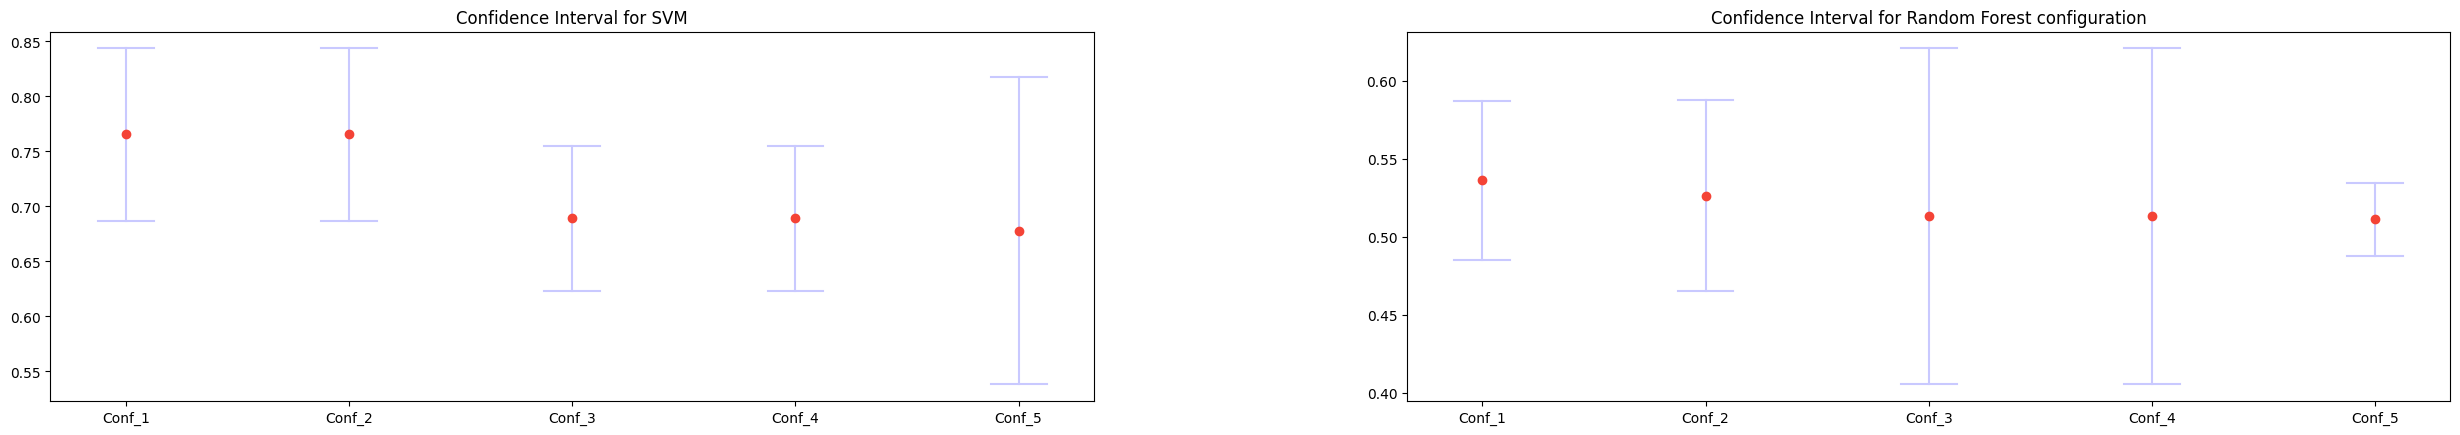

In [ ]:
#YOUR CODE STARTS HERE#
plt.figure().set_figwidth(12)
def plot_confidence_interval(means, stds,j, z=1.96, color='#c9c9ff', horizontal_line_width=0.25):
   plt.subplot(1, 2, j) # row 1, col 2 index 1
   plt.xticks([1, 2, 3, 4,5], ['Conf_1', 'Conf_2', 'Conf_3', 'Conf_4', 'Conf_5'])
   for  i in range(len(means)):
      confidence_interval = means[i] * 1.96 * stds[i] / np.sqrt(5)
      left , right  = (i+1) - horizontal_line_width / 2 , (i+1) + horizontal_line_width / 2
      top , bottom = means[i] - confidence_interval , means[i] + confidence_interval
      plt.plot([(i+1), (i+1)], [top, bottom], color=color);
      plt.plot([left, right], [top, top], color=color);
      plt.plot([left, right], [bottom, bottom], color=color);
      plt.plot((i+1), means[i], 'o', color='#f44336');
plot_confidence_interval(means_SVM, stds_SVM,1)
plt.title('Confidence Interval for SVM');
plt.subplots_adjust(left=2,right = 4,wspace= .3);
plot_confidence_interval(means_RF,stds_RF,2 )
plt.title('Confidence Interval for Random Forest configuration');
#YOUR CODE ENDS HERE#
#THIS IS LINE 20#

For each plot produced, which combination of hyper-parameters would you select?

**Use at most 2 sentences (per plot).**

[comment]: <> (#SHOW_CELL#)

----------YOUR TEXT STARTS HERE----------

We selected the configuration that showed the best trade-off between mean and standard deviation of the accuracy.

For this reason we have chosen the first configuration for the SVM ant the $5^{th}$ for the Random Forest.

<div style="page-break-after: always; visibility: hidden">
\pagebreak
</div>

### 2.1.8
For each of the optimisations, obtain a classifier using the parameters you selected in step 2.1.6.

In [ ]:
#YOUR CODE STARTS HERE#





# Set the pipeline for the SVM model
pipe_SVM = make_pipeline(TfidfVectorizer(tokenizer = stemming_stop_tokenizer , ngram_range=(1, 2)),
                         SVC( C = 1. , kernel = 'poly', degree = 3, random_state = 160, tol = 0.001))
# Fit the SVM model
pipe_SVM.fit(train['Text'], train['Label'])  # apply scaling on training data

# Set the pipeline for the RF model
pipe_RF = make_pipeline(TfidfVectorizer(tokenizer = stemming_stop_tokenizer , ngram_range=(1, 2)),
                        RandomForestClassifier(n_jobs = -1 , max_features = 'sqrt', min_impurity_decrease = 0.0, min_samples_leaf = 1,min_samples_split = 2, random_state = 160))
# Fit the random forest
pipe_RF.fit(train['Text'], train['Label'])  # apply scaling on training data











#YOUR CODE ENDS HERE#
#THIS IS LINE 30#

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(ngram_range=(1, 2),
                                 tokenizer=<function stemming_stop_tokenizer at 0x7fead2c46950>)),
                ('randomforestclassifier',
                 RandomForestClassifier(n_jobs=-1, random_state=160))])

Apply the classifier(s) to obtain the confusion matrix on the test data and print it out.

[comment]: <> (#SHOW_CELL#)

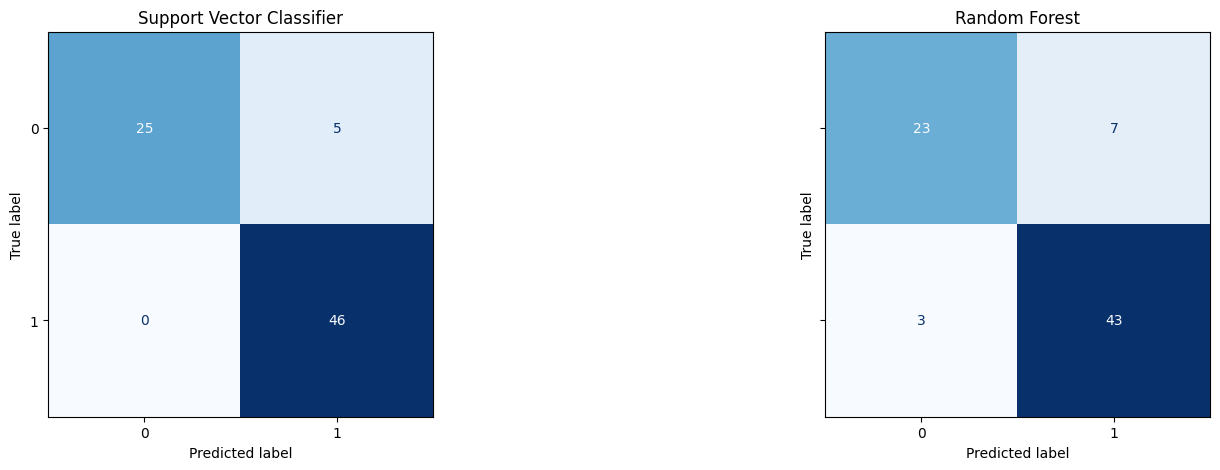

In [ ]:
#YOUR CODE STARTS HERE#
pred_test_y_SVM = pipe_SVM.predict( test['Text'] ) # Prediction SVM
pred_test_y_RF = pipe_RF.predict( test['Text'] )   # Prediction RF
f, axes = plt.subplots(1, 2, figsize=(20, 5), sharey='row') # Set the figure
classifiers = [ "Support Vector Classifier" , "Random Forest"]  # Name of the classifiers
def plot_confusion_matrix(mat, i): # Plot function
  cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = mat, display_labels = ["0", "1"]) # Compute the feature matrix
  cm_display.plot(ax=axes[i], cmap = plt.cm.Blues);
  cm_display.ax_.set_title(classifiers[i]);
  cm_display.im_.colorbar.remove();
  plt.subplots_adjust(wspace=0.005, hspace=0.05);
plot_confusion_matrix(metrics.confusion_matrix(test['Label'],pred_test_y_SVM), 0)
plot_confusion_matrix(metrics.confusion_matrix(test['Label'],pred_test_y_RF), 1)
#YOUR CODE ENDS HERE#
#THIS IS LINE 15#

<div style="page-break-after: always; visibility: hidden">
\pagebreak
</div>

## Part 2.2

### 2.2.1
You have a training set containing N documents. There are $M_1$ unique terms within the dataset.

The test dataset will have $M_2$ unique terms within it. However, we know that only a small amount of these will be in common with the training dataset.

What precautions could we use to preprocess the data?

What could we change at test time and which of the classification algorithms seen in class would best suit the change?

**Use at most 4 sentences.**

----------YOUR TEXT STARTS HERE----------

During the preprocessing we think that some useful techinques could be lemming and stemming in order to reduce the words to their more general meaning. This could be useful since we could have apparently different words but with the same semantic origin.\
As a classification algorithm Naive Bayes would probably be a good choice for this scenario. The main reason is that the laplace smoothing tecnique, often used with Naive Bayes, is able to handle unseen words in the training set that are present in the test set assigning to them non zero probability.

<div style="page-break-after: always; visibility: hidden">
\pagebreak
</div>


# Submission instructions

Follow the instructions precisely
1. Run the whole notebook up to this point
  * Click on this text cell and go to Runtime > Run before
  * It is essential that the notebook can be run from start to finish without us having to change anything.
2. Download the current notebook
  * File -> Download -> Download .ipynb
3. Upload the downloaded notebook in the current runtime
  * In the left sidebar menu, open the last tab (Files)
  * Click on the first button under the File title (Page with arrow pointing up)
  * In the new window, upload the notebook just downloaded



4. To turn the notebook into a pdf you need to install a Tex extension: run the next cell of code:

In [ ]:
#REMOVE_CELL#
!apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

5. Now, run the next cell to set some cell tags in the notebook file.

In [ ]:
#REMOVE_CELL#
import nbformat as nbf
from glob import glob
notebooks = glob("/content/**/*.ipynb", recursive=True)

text_search_dict = ["YOUR TEXT STARTS HERE","#YOUR CODE STARTS HERE#"]

for ipath in notebooks:
    print(ipath)
    ntbk = nbf.read(ipath, nbf.NO_CONVERT)

    for cell in ntbk.cells:
        cell_type = cell['cell_type'] == "code"

        cell_tags = cell.get('metadata', {}).get('tags', [])
        cell_tags = set(cell_tags)

        if cell_type == 0: #markdown
          if (cell['source'][0]!="#" and text_search_dict[cell_type] not in cell['source'] and "pagebreak" not in cell['source']) or "#REMOVE_CELL#" in cell['source']:
            cell_tags.add("remove_cell")

        else: #code
          #if text_search_dict[cell_type] not in cell['source'] or "#REMOVE_CELL#" in cell['source']:
          if "#REMOVE_CELL#" in cell['source']:
            cell_tags.add("remove_cell")
          elif "#REMOVE_OUTPUT#" in cell['source']:
            cell_tags.add("remove_output")

        if len(cell_tags) > 0:
            cell['metadata']['tags'] = list(cell_tags)

    nbf.write(ntbk, ipath)

6. Now, run the next cell to transform the notebook to PDF without the code cells.
  * The file will appear in the menu on the left (refresh if needed). The file should be named `DMT2023_HW3.pdf`
  * Rename this file **Surname1_Surname2_DMT2023_HW3_report.pdf** (e.g. Becchetti_Siciliano_DMT2023_HW3_report.pdf). Sort the surnames alphabetically.
  * Click on it and using the right button or the three dots at its side, click on download to transfer it to your local PC
  

In [ ]:
#REMOVE_CELL#
!jupyter nbconvert /content/DMT2023_HW3.ipynb --to pdf --TagRemovePreprocessor.remove_cell_tags='{"remove_cell"}' -TagRemovePreprocessor.remove_all_outputs_tags='{"remove_output"}'

7. Now, rename the downloaded notebook **Surname1_Surname2_DMT2023_HW3_notebook.ipynb** (e.g. Becchetti_Siciliano_DMT2023_HW3_notebook.ipynb). Sort the surnames alphabetically.

8. Now that you have both files, you need to upload them to Classroom. Only the student with the surname that comes first in alphabetical order **must** upload the files. Only the files uploaded by this student will be graded.